<a href="https://colab.research.google.com/github/YunusKaratepe/duygu-tanima/blob/main/classification_report_yunus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML


---------------------------------------------


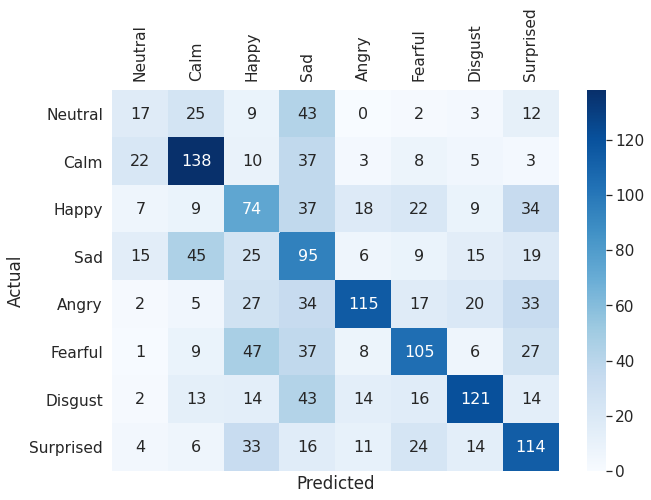

---------------------------------------------

Classification Report

              precision    recall  f1-score   support

     Neutral       0.24      0.15      0.19       111
        Calm       0.55      0.61      0.58       226
       Happy       0.31      0.35      0.33       210
         Sad       0.28      0.41      0.33       229
       Angry       0.66      0.45      0.54       253
     Fearful       0.52      0.44      0.47       240
     Disgust       0.63      0.51      0.56       237
   Surprised       0.45      0.51      0.48       222

    accuracy                           0.45      1728
   macro avg       0.45      0.43      0.44      1728
weighted avg       0.47      0.45      0.46      1728



In [ ]:
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn





sentimentClasses = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']

matrixStr1 ="""[ 6 11  3 13  0  0  1  5]
 [ 1 59  3 10  0  3  1  2]
 [ 1  5 19 15  3  8  2 12]
 [ 0 20  7 30  2  1  4 10]
 [ 0  1 13 11 40  2 14 15]
 [ 0  2  7 14  1 36  2  9]
 [ 0  4  4  7  6  7 46  2]
 [ 0  1  6  5  2  8  3 51]"""


matrixStr2 = """[ 0 10  3 21  0  0  0  2]
 [ 3 51  4 12  1  2  1  1]
 [ 0  3 26 12  6  2  3 15]
 [ 1 19  7 43  2  4  7  4]
 [ 0  2 11 14 37  0  2  9]
 [ 0  3 20 15  3 26  2  9]
 [ 0  5  4 18  3  1 46  6]
 [ 0  2 17  5  3  4  8 36]"""

matrixStr3 = """[11  4  3  9  0  2  2  5]
 [18 28  3 15  2  3  3  0]
 [ 6  1 29 10  9 12  4  7]
 [14  6 11 22  2  4  4  5]
 [ 2  2  3  9 38 15  4  9]
 [ 1  4 20  8  4 43  2  9]
 [ 2  4  6 18  5  8 29  6]
 [ 4  3 10  6  6 12  3 27]"""

matrixStrArr = []
matrixStrArr.append(matrixStr1)
matrixStrArr.append(matrixStr2)
matrixStrArr.append(matrixStr3)


arr =matrixStr1.split("\n ")


confMatrixArr = [[], [], []]

counter = 0
for arrelement in matrixStrArr:
  arr = arrelement.split("\n ")
  for line in arr:
    line = line[1:-1]

    line = line.replace(" ", "  ")
    line = line.split("  ")


    splittedLine = []
    for element in line:
      if element != '':
        splittedLine.append(int(element))

    confMatrixArr[counter].append(splittedLine)

  counter += 1



#dikey: predicted  - yatay: true label

newConfMat = []
for i in range(8):
  newConfMat.append([0, 0, 0, 0, 0, 0, 0, 0])

newConfMat = np.array(newConfMat) 

for mat in confMatrixArr:
  mat = np.array(mat)    
  newConfMat = np.add(mat, newConfMat)




yPred = []
yTrue = []

for i in range(8):
  for j in range(8):

    for k in range(newConfMat[i][j]):
      yTrue.append(i + 1)

for i in range(8):
  for j in range(8):
    for k in range(newConfMat[i][j]):
      yPred.append(j + 1)








print("---------------------------------------------")
#print((arr==newConfMat).all())


# data = {'y_Actual':    yTrue,
#         'y_Predicted': yPred
#         }


# df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], columns=sentimentClasses)

# sn.heatmap(confusion_matrix, annot=True)
# plt.show()

df_cm = pd.DataFrame(newConfMat, columns=sentimentClasses, index = sentimentClasses)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
    
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})# font size
plt.show()




print("---------------------------------------------")
print('\nClassification Report\n')
report = classification_report(yTrue, yPred, target_names = sentimentClasses)
print(report)

# DL

In [ ]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import librosa
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras import activations

import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sn

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/colab/final_project

/content/drive/MyDrive/colab/final_project


In [ ]:
def getDataset(directory: str, seed: int): 

  train_set=tf.keras.preprocessing.image_dataset_from_directory(
      directory,
      labels="inferred",
      label_mode="categorical",
      subset="training",
      class_names=None,
      shuffle=True,
      seed = seed, #10 50 100 verecegiz 
      batch_size=32,
      image_size=(128, 128),
      validation_split = 0.2,
      #interpolation="lanczos5"
  )

  test_set = tf.keras.preprocessing.image_dataset_from_directory(
      directory,
      labels="inferred",
      label_mode="categorical",
      subset="validation",
      validation_split = 0.2,
      class_names=None,
      shuffle=True,
      seed = seed, #10 50 100 verecegiz
      batch_size=32,
      image_size=(128, 128),
      #interpolation="lanczos5"
  )
  #print(test_set)
  #for data, labels in test_set:
    #print(data.shape)  # (64, 200, 200, 3)
  return train_set, test_set

In [ ]:
linear_path = './spec_data/LinearSpectrogram/LinearSpectrogramOriginal/'
linear_augNormal_path = './spec_data/LinearSpectrogram/LinearSpectrogram_AugNormal/'
linear_augDerivative1_path = './spec_data/LinearSpectrogram/LinearSpectrogram_AugDerivativeOrder1/'
linear_augDerivative2_path = './spec_data/LinearSpectrogram/LinearSpectrogram_AugDerivativeOrder2/'

log_path = './spec_data/LogSpectrogram/LogSpectrogramOriginal/'
log_augNormal_path = './spec_data/LogSpectrogram/LogSpectrogram_AugNormal/'
log_augDerivative1_path = './spec_data/LogSpectrogram/LogSpectrogram_AugDerivativeOrder1/' 
log_augDerivative2_path = './spec_data/LogSpectrogram/LogSpectrogram_AugDerivativeOrder2/'

Found 2880 files belonging to 8 classes.
Using 2304 files for training.
Found 2880 files belonging to 8 classes.
Using 576 files for validation.


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[2.0224452e-03 3.0205896e-01 1.8369347e-02 ... 7.1353270e-03
  6.1918646e-01 1.8069643e-04]
 [2.0643599e-02 1.8687497e-06 1.1338676e-05 ... 1.2559339e-04
  9.1376789e-03 9.4708979e-01]
 [9.9168175e-01 5.3308220e-03 4.7597173e-06 ... 2.5377629e-08
  1.7544506e-03 3.6411386e-04]
 ...
 [8.3732113e-02 4.9244542e-02 6.0769324e-03 ... 3.5404761e-03
  4.1315635e-03 1.9441203e-04]
 [2.5132973e-05 1.5840658e-04 8.6689222e-01 ... 5.9937529e-02
  1.2099305e-02 1.6454946e-02]
 [5.2957039e-04 8.1050573e-05 7.7373683e-01 ... 9.3639396e-02
  5.6276316e-05 3.7576007e-03]]
1. Matris: 
[[20  5  8  3  1  0  0  2]
 [ 3 67  0  9  0  0  0  0]
 [ 4  0 37  3  4  6  4  7]
 [ 6 12  8 35  6  1  2  4]
 [ 0  0  7  8 71  1  4  5]
 [ 2  1  7  1  4 48  3  5]
 [ 2  4  1  1  9  2 56  1]
 [ 1  0  6  1  2  2  1 63]]
------------------------------
Found 2880 files belonging to 8 classes.
Using 2304 files for training.
Found 2880 files belonging to 8 classes.
Using 576 files for validation.
[[3.8209611e-05 8.6574992e-06 4

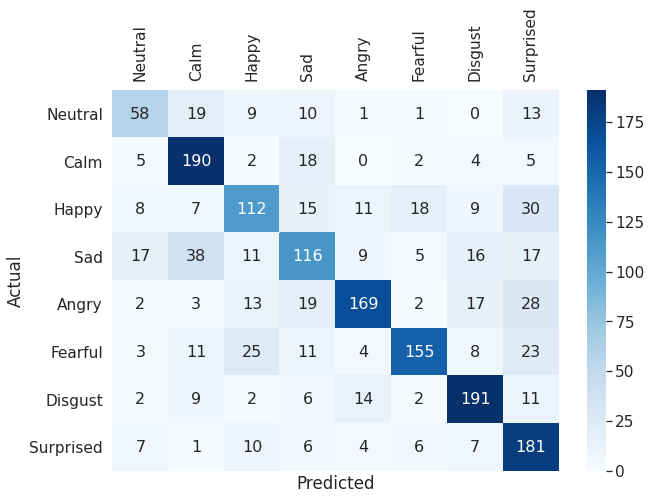

Acc: 0.6782407407407407
---------------------------------------------

Classification Report

              precision    recall  f1-score   support

     Neutral       0.57      0.52      0.54       111
        Calm       0.68      0.84      0.75       226
       Happy       0.61      0.53      0.57       210
         Sad       0.58      0.51      0.54       229
       Angry       0.80      0.67      0.73       253
     Fearful       0.81      0.65      0.72       240
     Disgust       0.76      0.81      0.78       237
   Surprised       0.59      0.82      0.68       222

    accuracy                           0.68      1728
   macro avg       0.67      0.67      0.66      1728
weighted avg       0.69      0.68      0.68      1728



In [ ]:
import sklearn.metrics as metrics

sentimentClasses = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']


newConfMat = []
for i in range(8):
  newConfMat.append([0, 0, 0, 0, 0, 0, 0, 0])


for i in range(3):
  cnnPath = ""
  if i == 0:
    cnnPath = '/content/drive/MyDrive/colab/final_project/models/seed10/linear_specAugment.h5' #seed = 10
    _, test_set = getDataset(seed=10, directory=linear_augNormal_path)
  elif i==1: 
    cnnPath = '/content/drive/MyDrive/colab/final_project/models/seed50/linear_specAugment.h5'  #Seed = 50
    _, test_set = getDataset(seed=50, directory=linear_augNormal_path)
  else:
    cnnPath = '/content/drive/MyDrive/colab/final_project/models/seed100/linear_specAugment.h5' #Seed= 100
    _, test_set = getDataset(seed=100, directory=linear_augNormal_path)
 
  model = keras.models.load_model(cnnPath)


  predictions = np.array([])
  labels =  np.array([])
  for x, y in test_set:
      predictions = np.concatenate([predictions, model.predict_classes(x)])
      labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

  result = model.predict(test_set)
  print(result)


  confusion_mat = metrics.confusion_matrix(labels, predictions)
  print(str(i+1) + ". Matris: ")
  print(confusion_mat)
  print("------------------------------")

  newConfMat = np.add(confusion_mat, newConfMat)


print("Toplanmış matris: ")
print(newConfMat)



df_cm = pd.DataFrame(newConfMat, columns=sentimentClasses, index = sentimentClasses)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
    
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})# font size
plt.show()



yPred = []
yTrue = []

for i in range(8):
  for j in range(8):

    for k in range(newConfMat[i][j]):
      yTrue.append(i + 1)

for i in range(8):
  for j in range(8):
    for k in range(newConfMat[i][j]):
      yPred.append(j + 1)




print("Acc:", metrics.accuracy_score(yTrue, yPred))
print("---------------------------------------------")
print('\nClassification Report\n')
report = classification_report(yTrue, yPred, target_names = sentimentClasses)
print(report)